In [4]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

The function below allows you to plot the phase plane of Eq. 1 for different value $\alpha$

In [61]:
def plot_phase_plane(alpha,b1=0.5,b2=0.5,w_ee=3.0):
    """Plots the phase plane of Eq. 1
    Args:
        alpha: inhibition parameter
        b1: bias for population 1
        b2: bias for population 2
        w_ee: self-excitation parameter
    """
    A = np.array([[-1, 0],
                    [0, -1]])
    # Quadrant I) 1<=h1 and 1<=h2
    B_1 = np.array([w_ee-2*alpha, w_ee-2*alpha])
    # Quadrant II)
    B_2 = np.array([-alpha,w_ee -alpha])
    # Quadrant III) h1<=0 and h2<=0
    B_3 = np.array([0,0])
    # Quadrant IV) 1<=h1 and h2<=0
    B_4 = np.array([w_ee-alpha, -alpha])
    
    
    # Note that case 2 and 3 are symmetric.
    b = np.array([b1, b2])
    
    # Calculate the fixed-points
    h_fp_1 = np.linalg.solve(A,-b-B_1)
    h_fp_2 = np.linalg.solve(A,-b-B_2)
    h_fp_3 = np.linalg.solve(A,-b-B_3)
    h_fp_4 = np.linalg.solve(A,-b-B_4)
    
    print("Fixed points:", h_fp_1, h_fp_2, h_fp_3, h_fp_4)
    
    ## Plot the (virtual) fixed-points
    plt.plot(h_fp_1[0],h_fp_1[1],'ro')
    plt.plot(h_fp_2[0],h_fp_2[1],'mo')
    plt.plot(h_fp_3[0],h_fp_3[1],'ko')
    plt.plot(h_fp_4[0],h_fp_4[1],'bo')
    
    ## Plot some labels
    plt.axhline(y=0, color="black")
    plt.axhline(y=1, color="black")
    plt.axvline(x=0, color="black")
    plt.axvline(x=1, color="black")
    plt.axis('equal')
    plt.xlabel(r"$h_1$")
    plt.ylabel(r"$h_2$")
    #XLI = plt.xlim()
    #YLI = plt.ylim()
    hmax = 2.5
    plt.xlim(-hmax,1+hmax)
    plt.xlim(-hmax,1+hmax)
    plt.text(4,3,'I')
    plt.text(-4,3,'II')
    plt.text(-4,-2,'III')
    plt.text(4,-2,'IV')
    
    ## Plot the vector field
    mar = 0.0
    # Quadrant 1
    xx_1 = np.linspace(1+mar,1+hmax,num=8)
    yy_1 = np.linspace(1+mar,1+hmax,num=8)
    (XX_1, YY_1) = np.meshgrid(xx_1, yy_1)
    
    dX_1 = A[0][0]*XX_1 + A[0][1]*YY_1 + b[0] + B_1[0]
    dY_1 = A[1][0]*XX_1 + A[1][1]*YY_1 + b[1] + B_1[1]
    
    # Quadrant II
    xx_2 = np.linspace(-hmax,-mar,num=8)
    yy_2 = np.linspace(1+mar,1+hmax,num=8)
    (XX_2, YY_2) = np.meshgrid(xx_2, yy_2)
    
    dX_2 = A[0][0]*XX_2 + A[0][1]*YY_2 + b[0] + B_2[0]
    dY_2 = A[1][0]*XX_2 + A[1][1]*YY_2 + b[1] + B_2[1]
    
    # Quadrant III
    xx_3 = np.linspace(-hmax,-mar,num=8)
    yy_3 = np.linspace(-hmax,-mar,num=8)
    (XX_3, YY_3) = np.meshgrid(xx_3, yy_3)
    
    dX_3 = A[0][0]*XX_3 + A[0][1]*YY_3 + b[0] + B_3[0]
    dY_3 = A[1][0]*XX_3 + A[1][1]*YY_3 + b[1] + B_3[1]

    # Quadrant IV
    xx_4 = np.linspace(1+mar,1+hmax,num=8)
    yy_4 = np.linspace(-hmax,-mar,num=8)
    (XX_4, YY_4) = np.meshgrid(xx_4, yy_4)
    
    dX_4 = A[0][0]*XX_4 + A[0][1]*YY_4 + b[0] + B_4[0]
    dY_4 = A[1][0]*XX_4 + A[1][1]*YY_4 + b[1] + B_4[1]    

    # Plot the vector field in the four quadrants
    plt.quiver(XX_1, YY_1, dX_1, dY_1, color='r', pivot='mid', width=0.002)
    plt.quiver(XX_2, YY_2, dX_2, dY_2, color='m', pivot='mid', width=0.002)
    plt.quiver(XX_3, YY_3, dX_3, dY_3, color='k', pivot='mid', width=0.002)
    plt.quiver(XX_4, YY_4, dX_4, dY_4, color='b', pivot='mid', width=0.002)


Example for $\alpha=0$:

Fixed points: [0.7 0.7] [-0.9  2.1] [0.5 0.5] [ 2.1 -0.9]


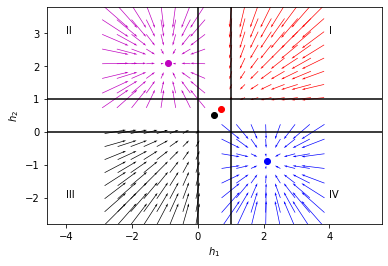

In [87]:
alpha =1.4
plot_phase_plane(alpha)

In [67]:
def g(input_potential):
    """ Implementation of the gain function. """
    if input_potential <= 0:
        activity = 0
    elif input_potential > 0 and input_potential < 1:
        activity = input_potential
    else:
        activity = 1
    return activity


def behaviour_model(
    time,
    dt=0.01,
    b1=0.5, b2=0.5,
    w_ee=3.0,
    alpha=1., sigma=.5,
    scale=0.001,
    h1_0=0, h2_0=0
):
    """ Implementation of the behaviour model.

    Parameters
    ----------
    time : np.array
        Duration that the simulation will run
    b1 : float
        Stimuli intensity to the population 1.
    b2 : float
        Stimuli intensity to the population 2.
    w_ee : float
        Self-excitation parameter.
    alpha : float
        Inhibition parameter.
    sigma : float
        Noise level.
    scale: float 
        Scaling of the noise.
    h1_0: float 
        Initial condition for h1
    h2_0: float 
        Initial condition for h2

    """
    #: duration
    duration = int(time / dt)
    #: matrix containing the population dynamics
    h = np.zeros((2, duration))
    #: set initial conditions
    h[0][0] = h1_0
    h[1][0] = h2_0
    #: euler integration
    for t in range(duration - 1):
        #: h1
        h[0][t + 1] = h[0][t] + dt * (-h[0][t] + b1 + (w_ee - alpha) * g(
            h[0][t]) - alpha * g(h[1][t])) + scale * sigma * np.random.normal()
        #: h2
        h[1][t + 1] = h[1][t] + dt * (-h[1][t] + b2 + (w_ee - alpha) * g(
            h[1][t]) - alpha * g(h[0][t])) + scale * sigma * np.random.normal()
    return h


def plot_results(h, time, ax=None, title=None):
    """ Plot the population dynamics.

    Parameters
    ----------
    h : np.array (2, Length)
        Matrix containing the population dynamics.
    time: np.array
        Time
    """
    if ax is None:
        ax = plt.gca()

    ax.plot(time, h[0][:], label='first population')
    ax.plot(time, h[1][:], label='second population')
    if title is None:
        ax.set_title('Time evolution of parameters')
    else:
        ax.set_title(title)
    plt.legend()


def run_question8():
    """ Plots the results for the question 8. """
    fig, axs = plt.subplots(2,2, figsize=(12, 9))
    for i, time_step in enumerate([0.01, 0.001]):
        #: correct scaling
        duration = 10
        scale = np.sqrt(time_step)
        h = behaviour_model(duration, time_step, scale=scale)
        title = 'correct scaling with dt = {}'.format(
            time_step)
        plot_results(h, np.arange(0, duration, time_step), ax=axs[0,i], title=title)
        # plt.savefig('correct_scale_dt_{}.png'.format(time_step))
        # plt.show()
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Membrane potential (mV)')
        
        scale = time_step
        h = behaviour_model(duration, time_step, scale=scale)
        # fig, ax = plt.subplots(figsize=(10, 6))
        title = 'wrong scaling with dt = {}'.format(
            time_step)
        plot_results(h, np.arange(0, duration, time_step), ax=axs[1,i], title=title)
        axs[1,0].set_xlabel('Time (s)')
        axs[1,1].set_xlabel('Time (s)')
        axs[0,0].set_ylabel('Membrane potential (mV)')
        axs[0,1].set_ylabel('Membrane potential (mV)')

    plt.suptitle("Time evolution of population activities")
    plt.savefig('new{}.png'.format(time_step))
    plt.show()

# Question 8 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


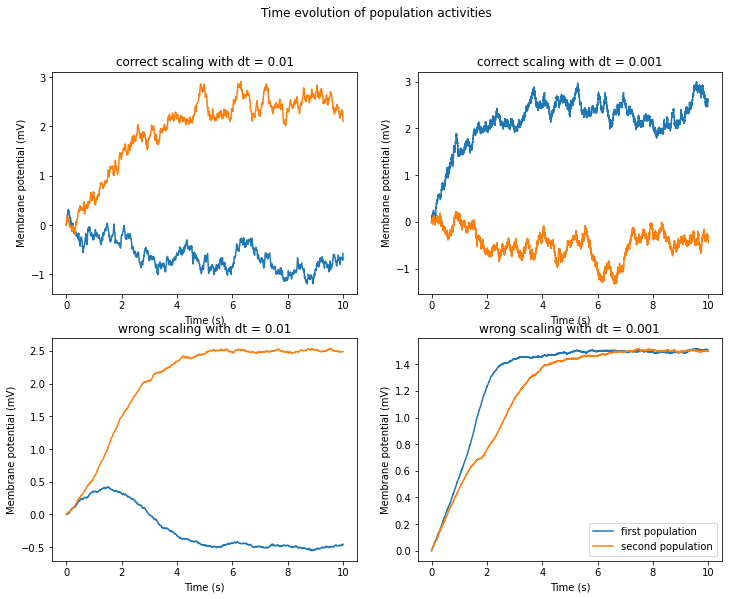

In [41]:
run_question8()

# Question 9

We found at question 3 that the fixed points for the Quadrant I is (b1 - w_ee - 2 * alpha, b2 - w_ee - 2 * alpha) whoch gives (0.5 - 3 - 2 * alpha, 0.5 - 3 - 2 * alpha) where alpha is 1.0, the value where 3 fixed points are observed. So p = (-4.5, -4.5)

In [85]:
def run_question9():
    """ Plots the results for the question 9. """
    fig, axs = plt.subplots(figsize=(9, 6))
    #: correct scaling
    duration = 10
    time_step = 0.001
    sigma = 0.05
    scale = np.sqrt(time_step)
    initial_condition = [2.3, -0.3]
    h = behaviour_model(duration, time_step, sigma=sigma, scale=scale,
                        h1_0=initial_condition[0], h2_0=initial_condition[1])
    title = 'sigma = {}'.format(
        sigma)
    plot_results(h, np.arange(0, duration, time_step), ax=axs, title=title)
    axs.set_ylabel("Membrane potential (mV)")
    axs.set_xlabel("Time (sec)")
    plt.suptitle("Time evolution of population activities")

    #plt.savefig('new{}.png'.format(time_step))
    plt.show()

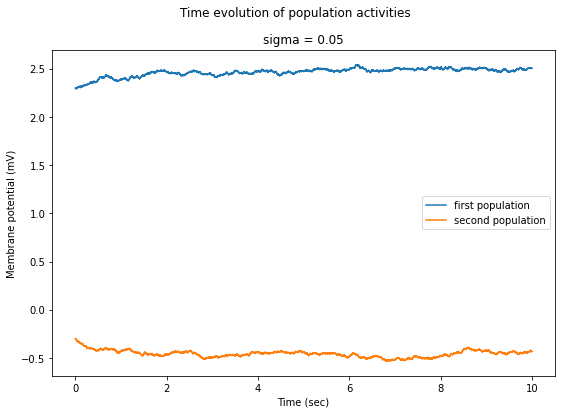

In [86]:
run_question9()

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


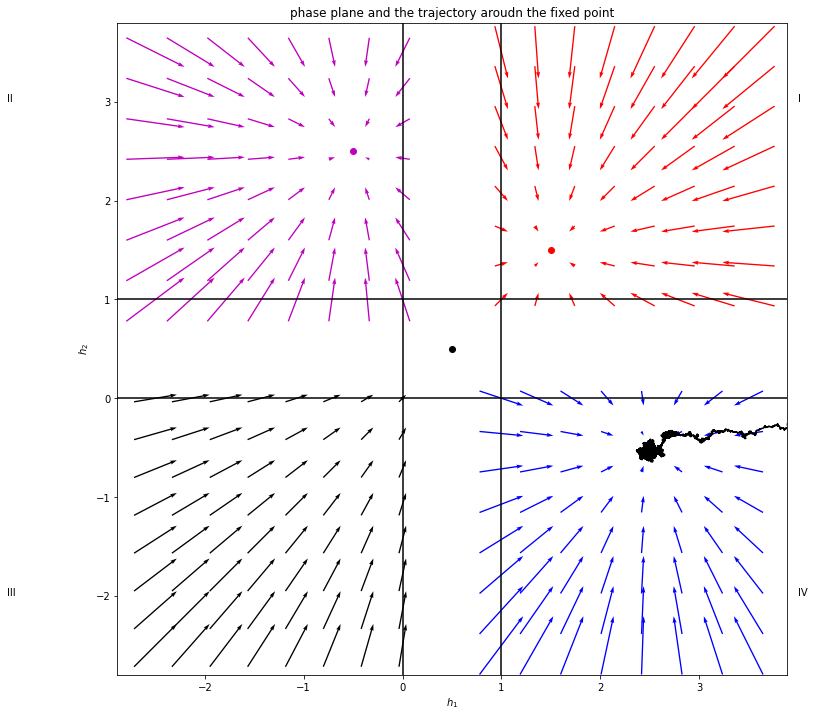

In [79]:
#: Choose sigma 0.1
sigma = .1
duration = 10
time_step = 0.001
scale = np.sqrt(time_step)
initial_condition = [4.3, -0.3]
h = behaviour_model(duration, time_step, sigma=sigma, scale=scale,
                    h1_0=initial_condition[0], h2_0=initial_condition[1])

fig, ax = plt.subplots(figsize = (12, 12))
plot_phase_plane(alpha= 1.0 , b1=0.5, b2=0.5, w_ee=3.0)
ax.plot(h[0][:], h[1][:], color = 'black', label = 'Trajectory')
plt.title("phase plane and the trajectory aroudn the fixed point")
#plt.savefig('phase_trajectory.png')
plt.show()

# Question 10

In [83]:
def run_question10():
    """ Plots the results for the question 10. """
    for i, sigma in enumerate([0.05, 0.1, 0.5, 1.0, 1.5]):
        fig, ax = plt.subplots(figsize=(9, 6))
        duration = 10
        time_step = 0.001
        scale = np.sqrt(time_step)
        initial_condition = [2.3, -0.3]
        h = behaviour_model(duration, time_step, sigma=sigma, scale=scale,
                            h1_0=initial_condition[0], h2_0=initial_condition[1])
        title = 'sigma = {}'.format(
            sigma)
        plot_results(h, np.arange(0, duration, time_step), ax=ax, title=title)
        ax.set_ylabel("Membrane potential (mV)")
        ax.set_xlabel("Time (sec)")
        plt.suptitle("Time evolution of population activities")

        #plt.savefig('new{}.png'.format(time_step))
        plt.show()

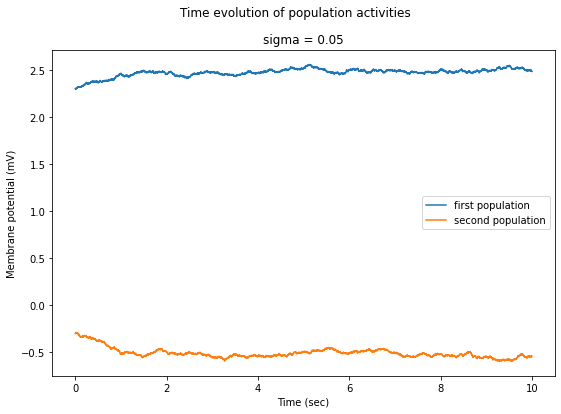

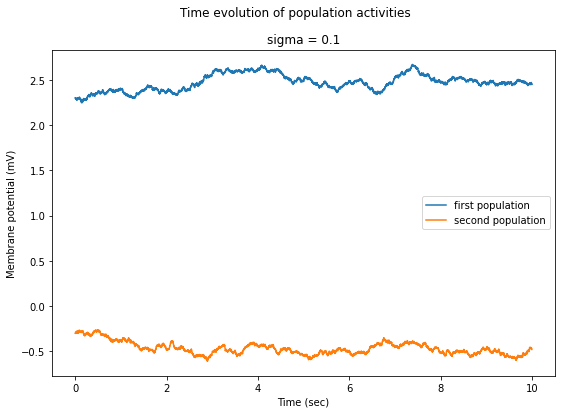

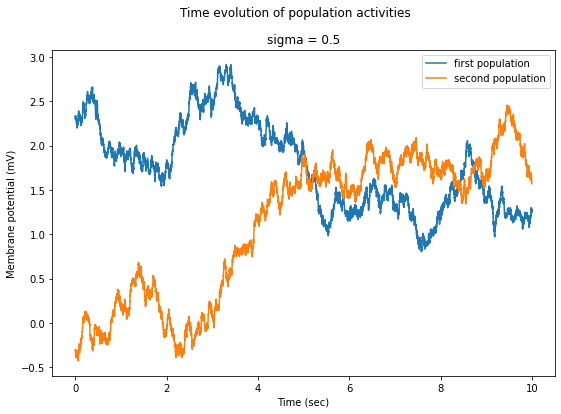

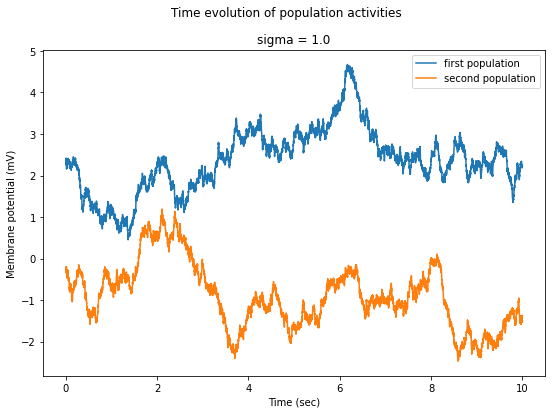

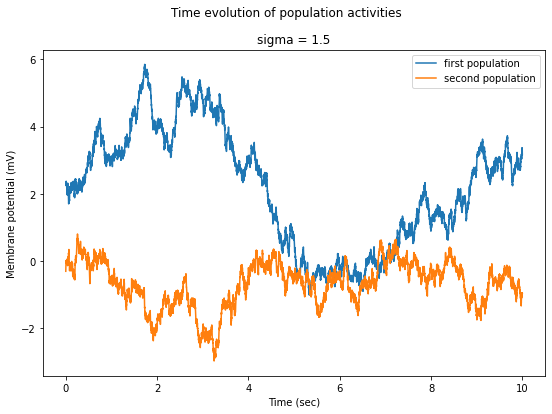

In [84]:
run_question10()

# Question 12 

In [ ]:
def decision_criteria(h1, h2): 
    if h1 - h2 < 0: 
        decision = 'left'
    else:
        decision = 'right'
    return decision

In [89]:
def run_question12():
    """ Plots the results for the question 12. """
    fig, axs = plt.subplots(figsize=(9, 6))
    #: correct scaling
    duration = 10
    time_step = 0.001
    sigma = 0.1
    scale = np.sqrt(time_step)
    initial_condition = [-1, -1]
    alpha = 1.4
    h = behaviour_model(duration, time_step, sigma=sigma, scale=scale, alpha=alpha,
                        h1_0=initial_condition[0], h2_0=initial_condition[1])
    title = 'sigma = {}'.format(
        sigma)
    plot_results(h, np.arange(0, duration, time_step), ax=axs, title=title)
    axs.set_ylabel("Membrane potential (mV)")
    axs.set_xlabel("Time (sec)")
    plt.suptitle("Time evolution of population activities")

    #plt.savefig('new{}.png'.format(time_step))
    plt.show()

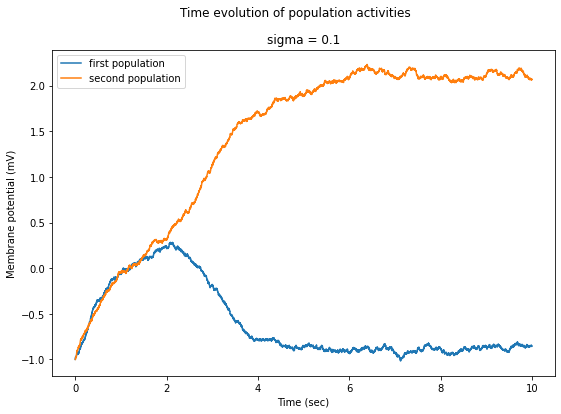

In [90]:
run_question12()

# Question 13

In [ ]:
def run_question13():
    """ Plots the results for the question 13. """
    fig, axs = plt.subplots(figsize=(9, 6))
    #: correct scaling
    duration = 10
    time_step = 0.001
    sigma = 0.1
    scale = np.sqrt(time_step)
    initial_condition = [-1, -1]
    alpha = 1.4
    h = behaviour_model(duration, time_step, sigma=sigma, scale=scale, alpha=alpha,
                        h1_0=initial_condition[0], h2_0=initial_condition[1])
    title = 'sigma = {}'.format(
        sigma)
    plot_results(h, np.arange(0, duration, time_step), ax=axs, title=title)
    axs.set_ylabel("Membrane potential (mV)")
    axs.set_xlabel("Time (sec)")
    plt.suptitle("Time evolution of population activities")

    #plt.savefig('new{}.png'.format(time_step))
    plt.show()